In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [17]:
monthPath = "MonthlyData"
if not os.path.exists(monthPath):
    os.mkdir(monthPath)


rootPath = "DailyData"
dirlist = []
for fd in os.listdir(rootPath): 
    if os.path.isdir(os.path.join(rootPath,fd)): # not .zip or .DS_Store
        dirlist.append(fd) # 201301
dirlist.sort(key= lambda x:int(x))  #sort by date for MacOS

for ds in dirlist:
    print(ds) # 201301 dir
    files = os.listdir(os.path.join(rootPath,ds)) # CN-Reanalysis-daily-2013010100.csv
    files.sort(key= lambda x:int(x[25:28]))  #sort by date for MacOS
    
    monthMean = pd.DataFrame(columns=['PM2.5(微克每立方米)', 'PM10(微克每立方米)', 'SO2(微克每立方米)', 'NO2(微克每立方米)',
           'CO(毫克每立方米)', 'O3(微克每立方米)', 'U(m/s)', 'V(m/s)', 'TEMP(K)',
           'RH(%)', 'PSFC(Pa)'])
  
    for csv in files: 
#         print(csv) # CN-Reanalysis-daily-2013010100.csv
        
        filename = os.path.join(monthPath, csv[20:-8]+".csv")
#         print(filename)
        if os.path.exists(filename):
            continue

        csv_data = pd.read_csv(os.path.join(rootPath,ds,csv))
        csv_data = csv_data.drop(columns=[" lat"," lon", " "])
        csv_data.columns = ['PM2.5(微克每立方米)', 'PM10(微克每立方米)', 'SO2(微克每立方米)', 'NO2(微克每立方米)',
       'CO(毫克每立方米)', 'O3(微克每立方米)', 'U(m/s)', 'V(m/s)', 'TEMP(K)',
       'RH(%)', 'PSFC(Pa)']
        monthMean = monthMean.append(csv_data.mean(),ignore_index=True)
    monthMean['WindSpeed(m/s)'] = monthMean.apply(lambda col: np.sqrt(col["U(m/s)"]**2+col["V(m/s)"]**2), axis=1) 
    monthMean.to_csv(filename,  encoding='utf_8_sig', index=False)
    
    

201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812


In [18]:
m201301 = pd.read_csv("MonthlyData/201301.csv")

In [19]:
m201301

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa),WindSpeed(m/s)
0,23.181031,32.423037,12.711589,9.592530,0.491038,56.411502,3.231680,-1.164830,263.355426,49.197813,83302.467686,3.435198
1,23.660468,30.692472,11.583565,9.145174,0.491856,53.985365,2.497468,-1.395854,263.090073,53.765587,83761.272423,2.861075
2,21.845292,27.449358,13.193936,8.664963,0.474934,52.907935,1.847381,-0.932442,261.519938,58.108553,83980.295363,2.069364
3,28.865950,35.456686,17.087798,10.653227,0.537011,52.334466,3.233375,0.222543,262.325555,57.021436,83566.638139,3.241024
4,34.352756,41.595893,18.679898,11.400416,0.580584,52.247884,3.358831,-0.536504,262.789128,55.631352,83403.397848,3.401408
5,40.832179,49.460569,20.752680,12.597236,0.639131,52.103938,2.796427,-0.389684,262.426701,56.112516,83467.970156,2.823448
6,46.062283,55.717749,21.223643,12.973247,0.658610,53.536459,2.465000,-0.642475,262.461065,56.879674,83420.617365,2.547351
7,47.554252,56.741625,19.568763,13.123530,0.674612,54.236047,2.014835,-1.312309,261.955013,57.331779,83534.801827,2.404520
8,45.820734,53.765619,19.781142,12.689455,0.642730,52.249180,2.354723,-1.024216,262.451844,55.452689,83516.064482,2.567827
9,54.251091,64.858280,21.849725,14.111030,0.703928,51.073461,1.954899,-0.424322,263.192498,57.022500,83519.300473,2.000420


### cal year mean

In [20]:
yearPath = "yearlyData"
if not os.path.exists(yearPath):
    os.mkdir(yearPath)
    
rootPath = "MonthlyData"

yearMean = pd.DataFrame(columns=['PM2.5(微克每立方米)', 'PM10(微克每立方米)', 'SO2(微克每立方米)', 'NO2(微克每立方米)',
   'CO(毫克每立方米)', 'O3(微克每立方米)', 'U(m/s)', 'V(m/s)', 'TEMP(K)',
   'RH(%)', 'PSFC(Pa)', 'WindSpeed(m/s)'])
    
for index,ds in enumerate(os.listdir(rootPath)):
#     print(ds) # 201301 csv

    filename = os.path.join(yearPath, ds[:4]+".csv")
#     print(filename)
    if os.path.exists(filename):
        continue

    csv_data = pd.read_csv(os.path.join(rootPath,ds))
    
    yearMean = yearMean.append(csv_data.mean(),ignore_index=True)
    
    if index%12==11:
        yearMean.to_csv(filename,  encoding='utf_8_sig', index=False)
        yearMean = pd.DataFrame(columns=['PM2.5(微克每立方米)', 'PM10(微克每立方米)', 'SO2(微克每立方米)', 'NO2(微克每立方米)',
           'CO(毫克每立方米)', 'O3(微克每立方米)', 'U(m/s)', 'V(m/s)', 'TEMP(K)',
           'RH(%)', 'PSFC(Pa)', 'WindSpeed(m/s)'])
yearMean.to_csv(filename,  encoding='utf_8_sig', index=False)

    

### 2018 no data

In [6]:
yearPath = "yearlyData"
    
rootPath = "MonthlyData"

yearMean = pd.DataFrame(columns=['PM2.5(微克每立方米)', 'PM10(微克每立方米)', 'SO2(微克每立方米)', 'NO2(微克每立方米)',
   'CO(毫克每立方米)', 'O3(微克每立方米)', 'U(m/s)', 'V(m/s)', 'TEMP(K)',
   'RH(%)', 'PSFC(Pa)', 'WindSpeed(m/s)'])
    
for index,ds in enumerate(os.listdir(rootPath)):
#     print(ds) # 201301 csv
    if ds[:4]!='2018':
        continue
    print(ds)
#     filename = os.path.join(yearPath, ds[:4]+".csv")

    csv_data = pd.read_csv(os.path.join(rootPath,ds))
    
    yearMean = yearMean.append(csv_data.mean(),ignore_index=True)

yearMean.to_csv(os.path.join(yearPath, "2018.csv"),  encoding='utf_8_sig', index=False)

    

201801.csv
201802.csv
201803.csv
201804.csv
201805.csv
201806.csv
201807.csv
201808.csv
201809.csv
201810.csv
201811.csv
201812.csv


In [21]:
y2013 = pd.read_csv("yearlyData/2013.csv")

In [22]:
y2013

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa),WindSpeed(m/s)
0,42.261410,51.744612,17.542037,12.305704,0.633386,53.853041,2.404250,-0.274625,265.325376,57.476476,83563.913914,2.563857
1,31.635389,38.247753,12.219398,8.391227,0.477614,58.654784,2.380374,0.033552,268.516764,59.419991,83509.252719,2.511463
2,28.217750,38.784811,10.145497,7.960234,0.376686,69.265678,1.786932,-0.341278,275.730271,50.259979,83316.141957,2.027033
3,29.791261,37.633518,7.802578,6.691401,0.311874,77.110643,1.318099,-0.666125,280.226386,50.598800,83113.264452,1.836164
4,32.708600,39.636780,7.815722,6.252861,0.297542,81.337494,0.860989,0.210787,286.700768,53.219797,82961.063968,1.284398
5,27.589642,33.171955,7.412047,5.866151,0.276067,82.993273,0.218450,0.582932,291.031836,56.137406,82795.331142,1.272994
6,22.685464,27.647452,6.360188,5.470097,0.244808,73.761212,0.317959,1.160746,293.027869,60.897135,82671.124525,1.320133
7,25.764239,31.212440,7.047534,5.669876,0.268876,75.215664,-0.165453,0.357880,292.576737,59.365445,82851.775018,1.258008
8,32.462199,38.863650,8.883072,6.843350,0.333260,73.481167,-0.031101,0.002007,287.247543,56.878378,83323.061788,1.004939
9,32.191811,40.458590,11.048552,9.550974,0.401694,67.175732,0.349725,-0.597558,281.671643,52.124370,83689.696686,0.995904


Text(0.5, 1.0, 'WindSpeed')

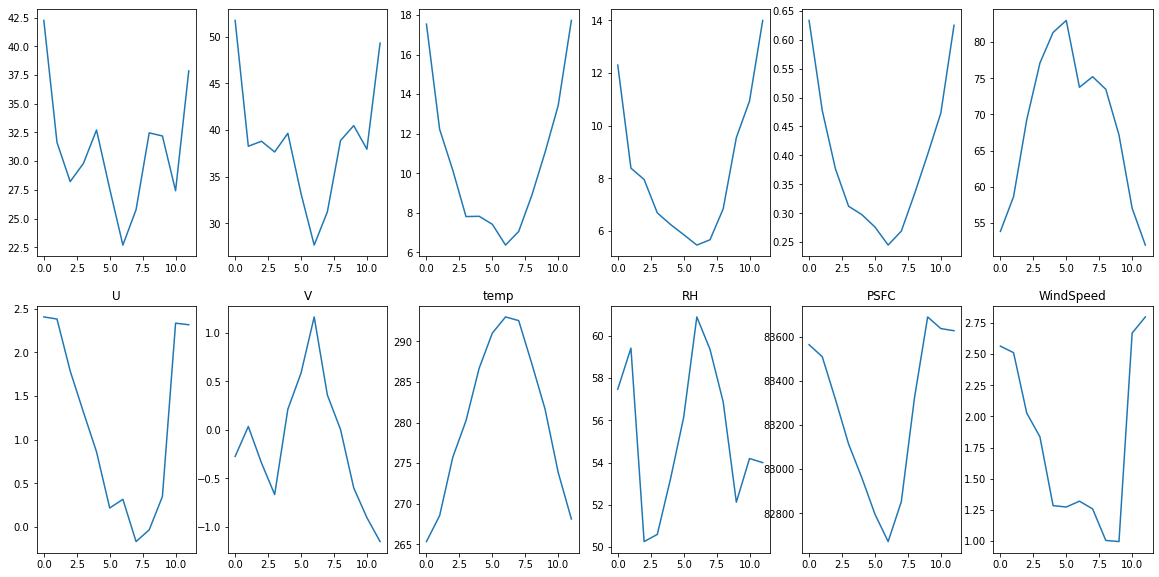

In [23]:
figure ,axes = plt.subplots(2,6,figsize=(20,10))


axes[0][0].plot(y2013['PM2.5(微克每立方米)'])
axes[0][1].plot(y2013['PM10(微克每立方米)'])
axes[0][2].plot(y2013['SO2(微克每立方米)'])
axes[0][3].plot(y2013['NO2(微克每立方米)'])
axes[0][4].plot(y2013['CO(毫克每立方米)'])
axes[0][5].plot(y2013['O3(微克每立方米)'])

axes[1][0].plot(y2013['U(m/s)'])
axes[1][0].set_title("U")
axes[1][1].plot(y2013['V(m/s)'])
axes[1][1].set_title("V")
axes[1][2].plot(y2013['TEMP(K)'])
axes[1][2].set_title("temp")
axes[1][3].plot(y2013['RH(%)'])
axes[1][3].set_title("RH")
axes[1][4].plot(y2013['PSFC(Pa)'])
axes[1][4].set_title("PSFC")
axes[1][5].plot(y2013['WindSpeed(m/s)'])
axes[1][5].set_title("WindSpeed")



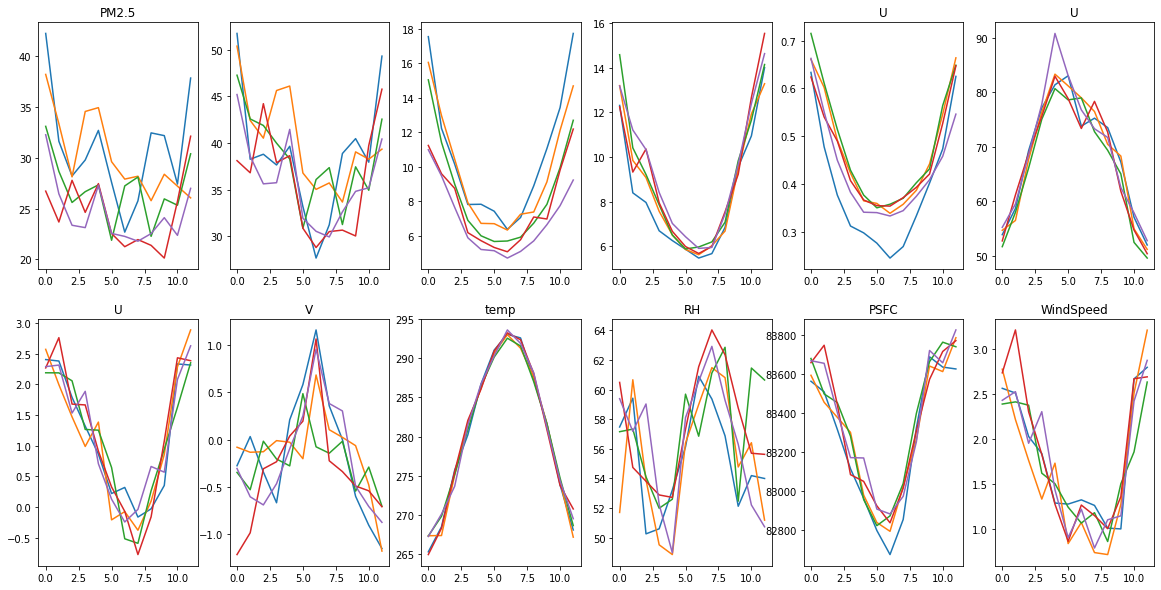

In [24]:
figure ,axes = plt.subplots(2,6,figsize=(20,10))

rootPath = "yearlyData"
for f in os.listdir(rootPath):
    if f[0]==".":
        continue
    monthMean = pd.read_csv(os.path.join(rootPath,f))

    axes[0][0].plot(monthMean['PM2.5(微克每立方米)'])
    axes[0][0].set_title("PM2.5")
    axes[0][1].plot(monthMean['PM10(微克每立方米)'])
    axes[1][1].set_title("V")
    axes[0][2].plot(monthMean['SO2(微克每立方米)'])
    axes[1][0].set_title("U")
    axes[0][3].plot(monthMean['NO2(微克每立方米)'])
    axes[1][0].set_title("U")
    axes[0][4].plot(monthMean['CO(毫克每立方米)'])
    axes[0][4].set_title("U")
    axes[0][5].plot(monthMean['O3(微克每立方米)'])
    axes[0][5].set_title("U")

    axes[1][0].plot(monthMean['U(m/s)'])
    axes[1][0].set_title("U")
    axes[1][1].plot(monthMean['V(m/s)'])
    axes[1][1].set_title("V")
    axes[1][2].plot(monthMean['TEMP(K)'])
    axes[1][2].set_title("temp")
    axes[1][3].plot(monthMean['RH(%)'])
    axes[1][3].set_title("RH")
    axes[1][4].plot(monthMean['PSFC(Pa)'])
    axes[1][4].set_title("PSFC")
    axes[1][5].plot(monthMean['WindSpeed(m/s)'])
    axes[1][5].set_title("WindSpeed")


